LSTM

In [1]:
pip install scalecast --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 368 kB 8.9 MB/s 
     |████████████████████████████████| 216 kB 49.1 MB/s 
     |████████████████████████████████| 133 kB 50.9 MB/s 
  Created wheel for scalecast: filename=SCALECAST-0.14.7-py3-none-any.whl size=97997 sha256=90de44ea077b4c289f02268e071a08550c4cdc6571c9b524e1e0609d8c474fdc
  Stored in directory: /root/.cache/pip/wheels/da/82/68/2022e527d647dc0ac81a8299d5251bb4f58c9d6d4eb8e479c0
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=69769e3102a8e7c6c853aaf696dbb574f74733acdfad05346839b2a042a06452
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built scalecast eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dep

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
sns.set(rc={'figure.figsize':(15,8)})
df=pd.read_excel('/content/drive/MyDrive/Data_Pal.xlsx',parse_dates=['Date'])
#df = pd.read_csv('AirPassengers.csv',parse_dates=['Month'])

In [4]:
df.head(10)

,Ecole,Date,Code_District,Code_Centre,Code_Option,Num_Ecole_Centre,Code_gestion_Etabli,Participants,Participans_Fille_total,Participants_Garcon,Total_Reussite,Reussite_Fille,Reussite_Garcon,Unnamed: 13,Unnamed: 14
0,2735.0,2019-07-16,11,1,101.0,1.0,7.0,5.0,2.0,3,2.0,1.0,1,NaN,NaN
1,1707.0,2019-07-16,11,1,101.0,2.0,7.0,25.0,15.0,10,21.0,12.0,9,NaN,NaN
2,944.0,2019-07-16,11,1,101.0,3.0,2.0,49.0,26.0,23,49.0,26.0,23,NaN,NaN
3,1654.0,2019-07-16,11,1,101.0,4.0,7.0,54.0,29.0,25,54.0,29.0,25,NaN,NaN
4,2668.0,2019-07-16,11,1,101.0,5.0,7.0,13.0,8.0,5,9.0,4.0,5,NaN,NaN
5,2163.0,2019-07-16,11,1,101.0,6.0,7.0,10.0,6.0,4,10.0,6.0,4,NaN,NaN
6,2358.0,2019-07-16,11,1,101.0,7.0,7.0,41.0,25.0,16,39.0,23.0,16,NaN,NaN
7,105.0,2019-07-16,11,1,101.0,8.0,7.0,6.0,4.0,2,6.0,4.0,2,NaN,NaN
8,453.0,2019-07-16,11,1,101.0,9.0,7.0,10.0,6.0,4,0.0,0.0,0,NaN,NaN
9,284.0,2019-07-16,11,2,101.0,1.0,7.0,3.0,3.0,0,3.0,3.0,0,NaN,NaN


In [5]:
f = Forecaster(y=df['Participants'], current_dates=df['Date'])
f

Forecaster(
    DateStartActuals=2019-07-16T00:00:00.000000000
    DateEndActuals=2021-09-29T00:00:00.000000000
    Freq=None
    N_actuals=25100
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

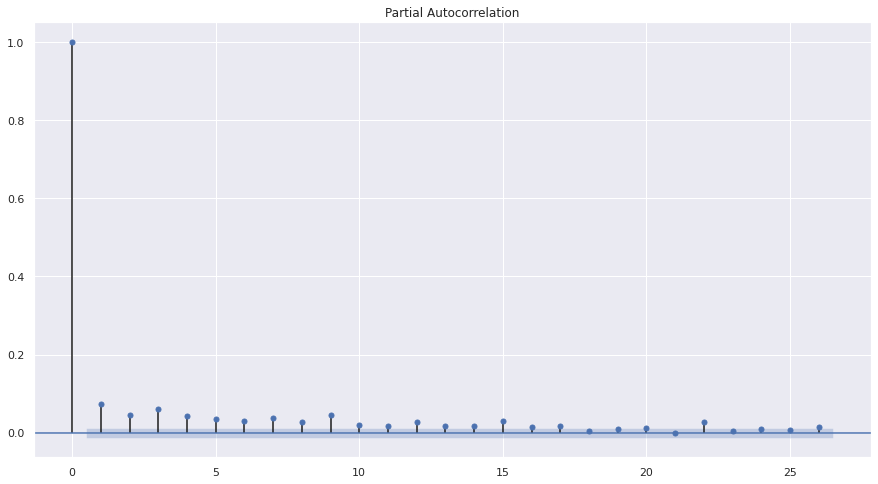

In [6]:
f.plot_pacf(lags=26)
plt.show()

In [7]:
import statsmodels as sm
import statsmodels.api as sm

In [8]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)

In [9]:
stat

-16.590473765430485

In [10]:
pval

1.8008129255106789e-29

In [11]:
f.set_test_length(10000)       # 1. 12 observations to test the results
f.generate_future_dates(10000) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

472/472 [==============================] - 5s 7ms/step - loss: 0.0429


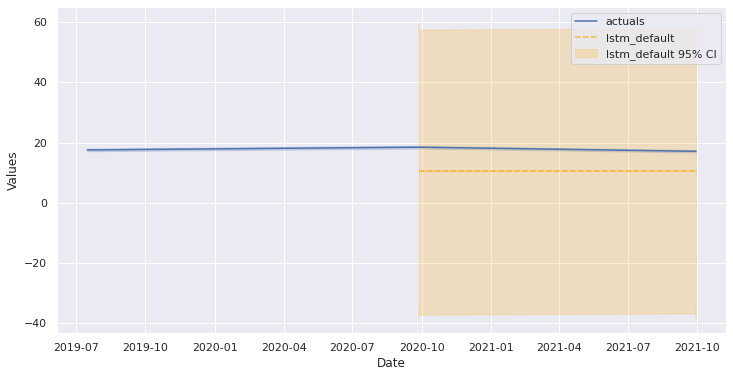

In [12]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

472/472 [==============================] - 9s 15ms/step - loss: 0.0429


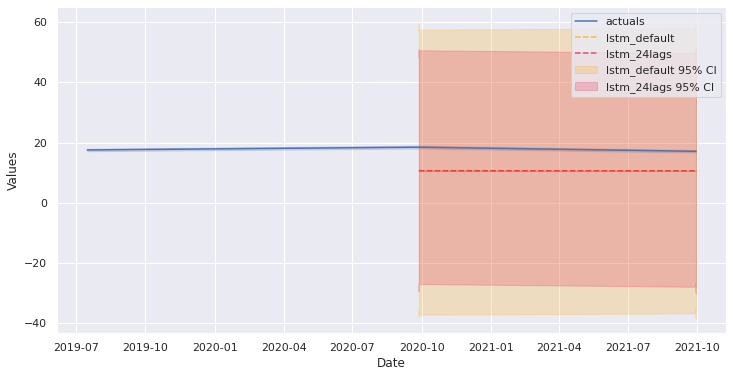

In [13]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
127/127 [==============================] - 6s 23ms/step - loss: 0.0438 - val_loss: 0.0435
Epoch 2/5
127/127 [==============================] - 2s 17ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 3/5
127/127 [==============================] - 2s 17ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 4/5
127/127 [==============================] - 2s 17ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 5/5
127/127 [==============================] - 2s 18ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 1/5
377/377 [==============================] - 9s 18ms/step - loss: 0.0430 - val_loss: 0.0425
Epoch 2/5
377/377 [==============================] - 6s 17ms/step - loss: 0.0425 - val_loss: 0.0425
Epoch 3/5
377/377 [==============================] - 6s 15ms/step - loss: 0.0425 - val_loss: 0.0424
Epoch 4/5
377/377 [==============================] - 6s 15ms/step - loss: 0.0425 - val_loss: 0.0425
Epoch 5/5
377/377 [==============================] - 5s 15ms/step - loss: 0.0425 - val_loss: 0.0425


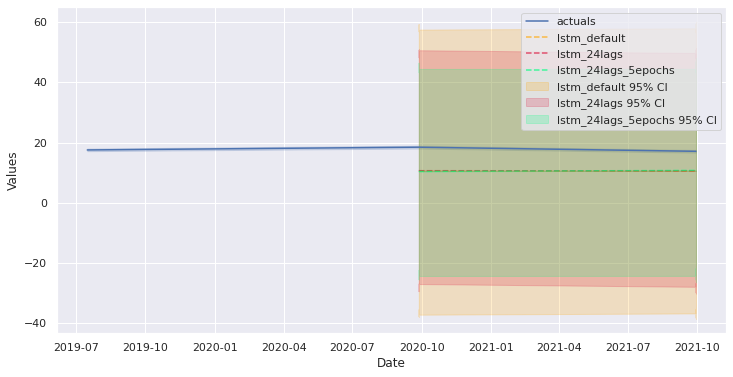

In [14]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/25
127/127 [==============================] - 10s 41ms/step - loss: 0.0437 - val_loss: 0.0435
Epoch 2/25
127/127 [==============================] - 4s 32ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 3/25
127/127 [==============================] - 4s 31ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 4/25
127/127 [==============================] - 4s 32ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 5/25
127/127 [==============================] - 4s 32ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 6/25
127/127 [==============================] - 4s 31ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 7/25
127/127 [==============================] - 4s 31ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 8/25
127/127 [==============================] - 4s 32ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 9/25
127/127 [==============================] - 4s 32ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 10/25
127/127 [==============================] - 4s 31ms/step - loss: 0.0423 - val_l

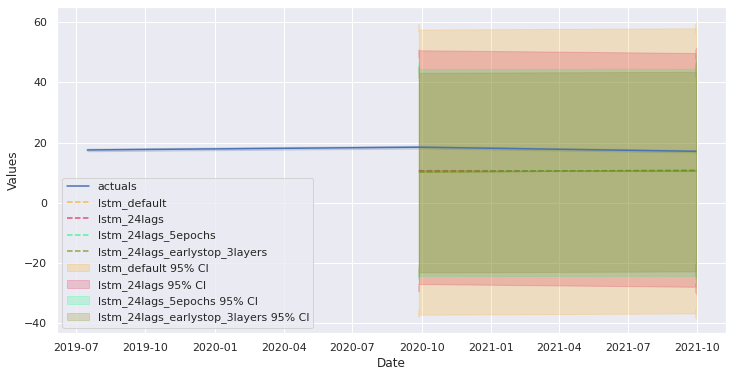

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
127/127 [==============================] - 30s 188ms/step - loss: 0.0434 - val_loss: 0.0435
Epoch 2/15
127/127 [==============================] - 15s 116ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 3/15
127/127 [==============================] - 13s 99ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 4/15
127/127 [==============================] - 12s 98ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 5/15
127/127 [==============================] - 12s 98ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 6/15
127/127 [==============================] - 12s 97ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 7/15
127/127 [==============================] - 14s 113ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 8/15
127/127 [==============================] - 12s 97ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 9/15
127/127 [==============================] - 12s 97ms/step - loss: 0.0423 - val_loss: 0.0435
Epoch 10/15
127/127 [==============================] - 12s 98ms/step - loss: 0.

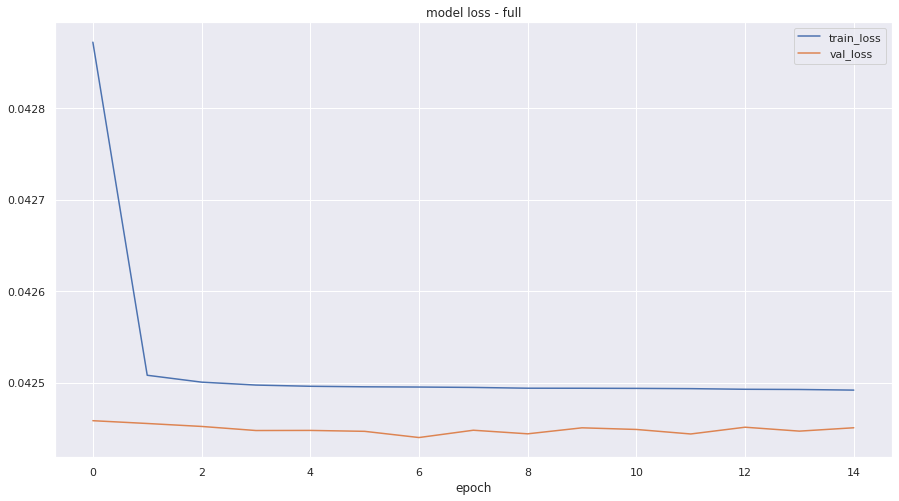

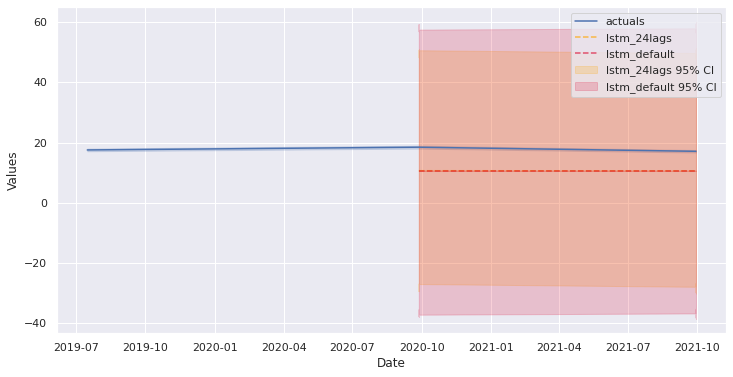

In [16]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [17]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

In [ ]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

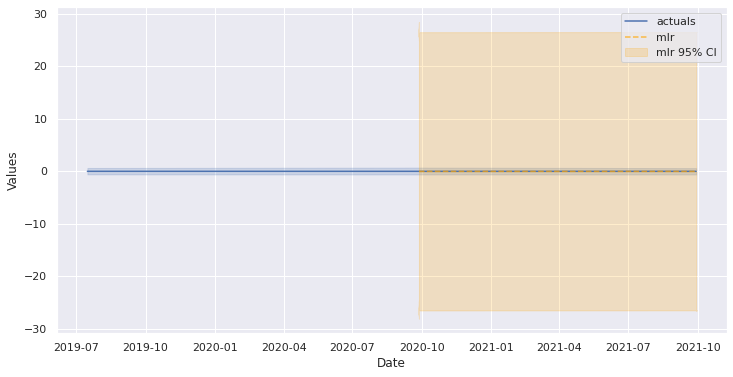

In [ ]:
f.plot_test_set(models='mlr',ci=True)

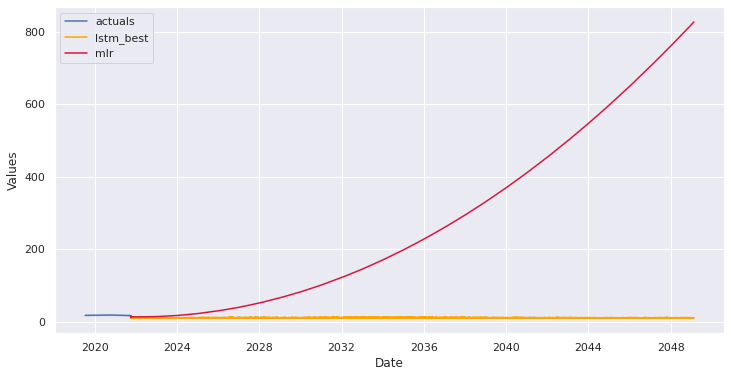

In [ ]:
f.plot(models=['mlr','lstm_best'],
       order_by='LevelTestSetMAPE',
       level=True)

In [ ]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetMAE',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetMAE,best_model
0,lstm_24lags,1.090304,22.541266,11.856630,True
1,lstm_default,1.095854,22.521619,11.849147,False
2,lstm_24lags_5epochs,1.102893,22.523353,11.865944,False
3,lstm_24lags_earlystop_3layers,1.108380,22.519957,11.880917,False
4,lstm_best,1.125254,22.501714,11.917467,False
5,mlr,3.637123,41.000235,31.059848,False
